# FlameStream workers scalability comparision

In [61]:
prep <- function(path) {
    return (tail(scan(path, sep = ","), -200) / 1e6)
}
fl.8450160 <- prep("fl-8450160.data")
fl.0d0784a <- prep("fl-0d0784a.data")
fs.0d0784a <- prep("fs-0d0784a.data")
fs.002017b0 <- prep("fs-002017b0.data")
fs.tmp <- prep("fs-799337f.data")
sizes <- tail(scan("1k.data", sep = ","), -200)

In [62]:
summary(fs.tmp)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.912   9.047  18.618  25.988  34.792 171.580 

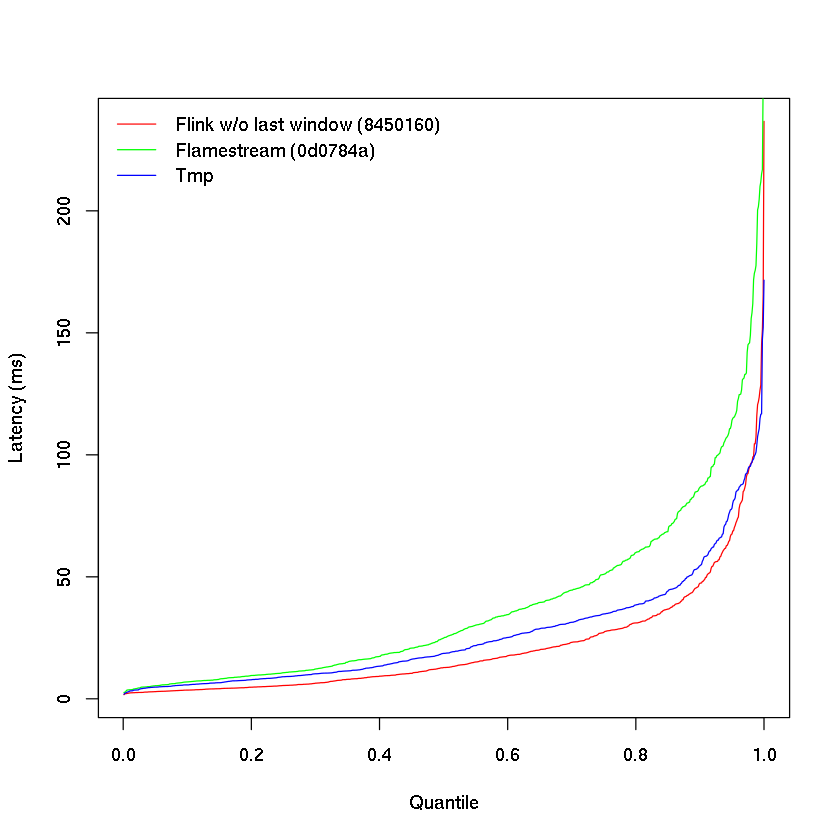

In [63]:
quntiles.1000 <- seq(1, length(fs.0d0784a)) / length(fs.0d0784a)
plot(quntiles.1000, sort(fl.8450160), type = "l", col = "red",  xlab = "Quantile", ylab = "Latency (ms)")
lines(quntiles.1000, sort(fs.0d0784a), col = "green")
lines(quntiles.1000, sort(fs.tmp), col = "blue")
legend(
    "topleft", 
    legend = c("Flink w/o last window (8450160)", "Flamestream (0d0784a)", "Tmp"), 
    col = c("red", "green", "blue"),
    lty = c(1, 1, 1, 1),
    bty = "n",
    text.col = "black"
)

In [64]:
bars <- function(a, b, col.names = c("FlameStream", "Flink")) {
    m <- matrix(c(quantile(a, p = 0.5),
        quantile(a, p = 0.95) - quantile(a, p = 0.5),
        quantile(a, p = 0.99) - quantile(a, p = 0.95),
        quantile(b, p = 0.5),
        quantile(b, p = 0.95) - quantile(b, p = 0.5),
        quantile(b, p = 0.99) - quantile(b, p = 0.95)), nrow=3)
    colnames(m) <- col.names
    rownames(m) <- c("50%", "95%", "99%")
    barplot(m, horiz = T, col = c("grey20", "grey50", "grey80"), xlab = "Latency (ms)")
    legend("bottomright",
           title = "Quantiles",
           legend = c("50%", "95%", "99%"), 
           fill = c("grey20", "grey50", "grey80"))
}

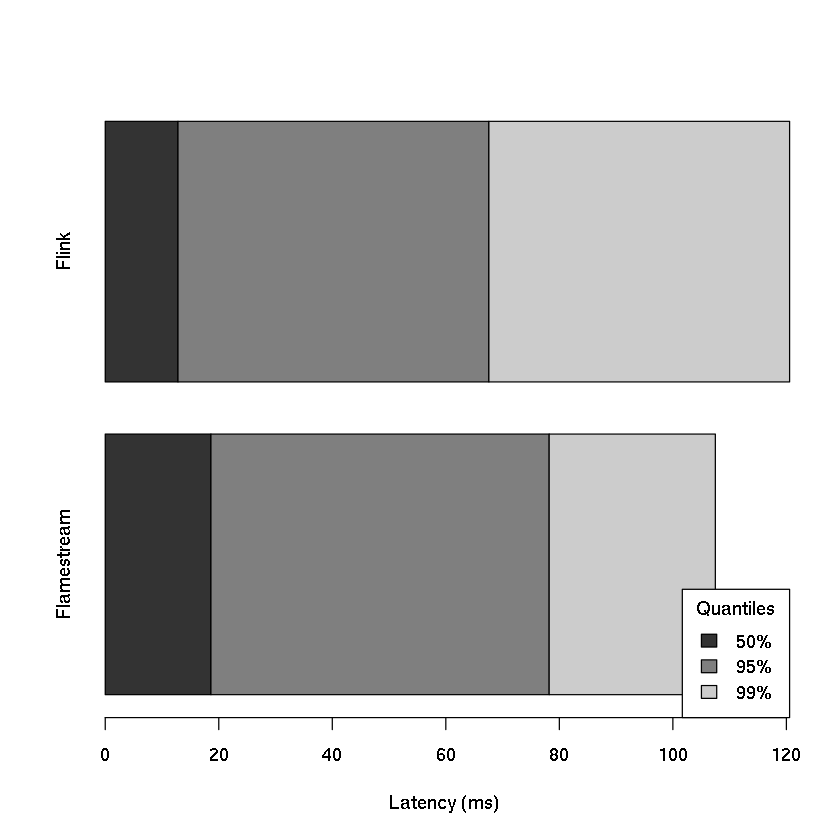

In [65]:
bars(fs.tmp, fl.8450160, c("Flamestream", "Flink"))

In [66]:
wilcox.test(fs.tmp, fl.8450160, paired = T)


	Wilcoxon signed rank test with continuity correction

data:  fs.tmp and fl.8450160
V = 273270, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


# Comparing cpu usage of different flatmap placement

..79.233 - node with flatmap

..2.233 - input node

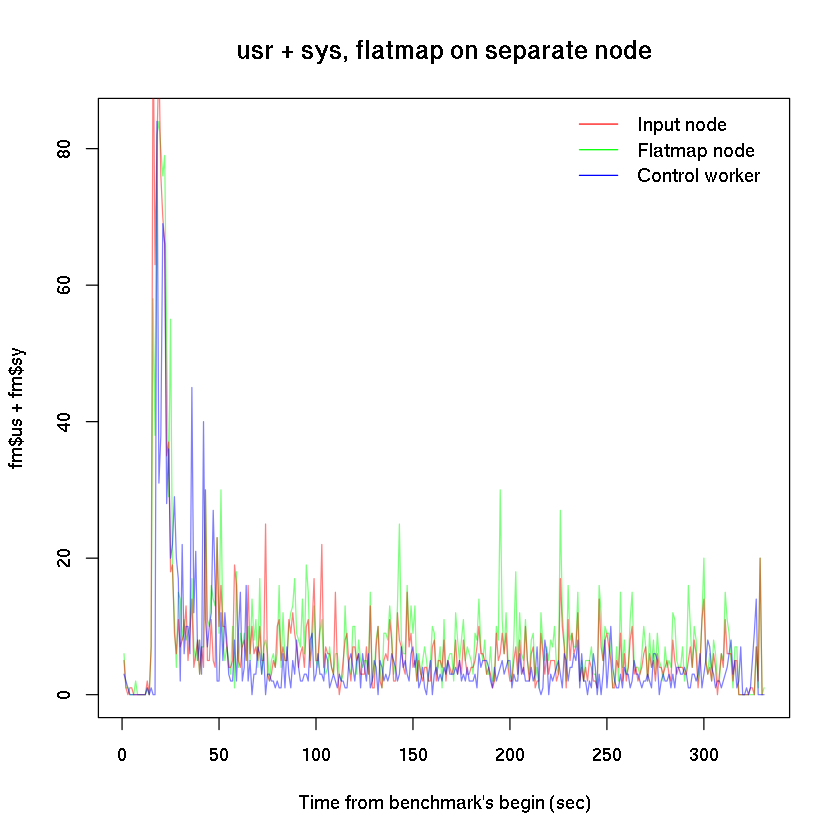

In [73]:
input <- read.table("vmstat/input.data", sep = "" , header = T, skip = 1)
fm <- read.table("vmstat/fm.data", sep = "" , header = T, skip = 1)
control <- read.table("vmstat/control1.data", sep = "" , header = T, skip = 1)

plot(fm$us + fm$sy, t="l", col = rgb(0, 1, 0, 0.5), 
     main = "usr + sys, flatmap on separate node", 
     xlab = "Time from benchmark's start (sec)")
lines(input$us + input$sy, col=rgb(1, 0, 0, 0.5))
lines(control$us + control$sy, col=rgb(0, 0, 1, 0.5))
legend(
    "topright", 
    legend = c("Input node", "Flatmap node", "Control worker"), 
    col = c("red", "green", "blue"),
    lty = c(1, 1, 1),
    bty = "n",
    text.col = "black"
)

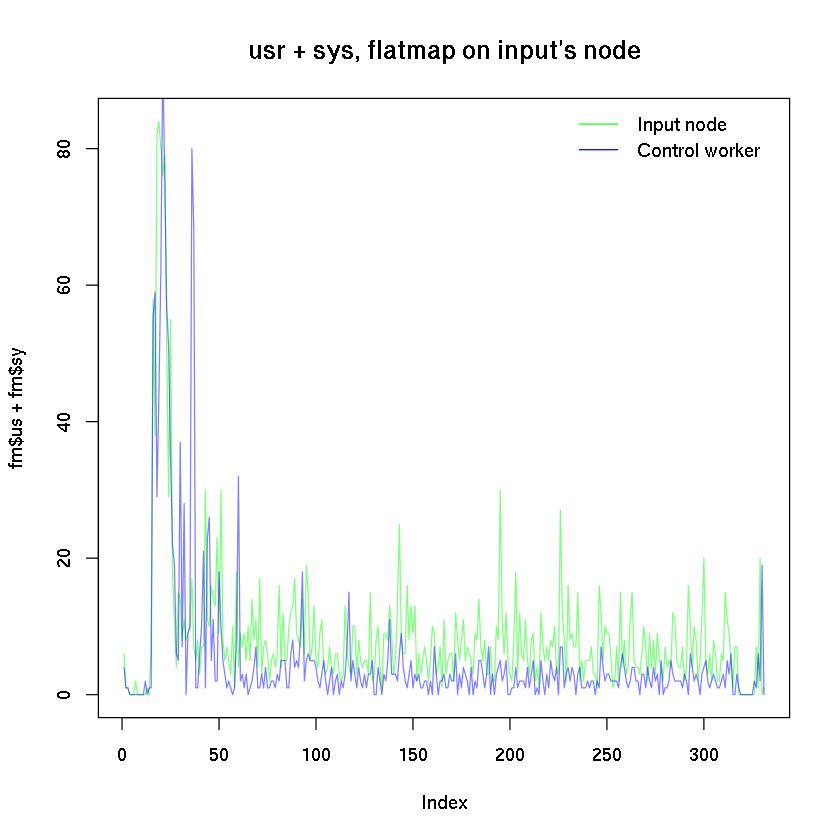

In [72]:
input <- read.table("vmstat/fm-input.data", sep = "" , header = T, skip = 1)
control <- read.table("vmstat/control2.data", sep = "" , header = T, skip = 1)

plot(fm$us + fm$sy, t="l", col = rgb(0, 1, 0, 0.5), main = "usr + sys, flatmap on input's node")
lines(control$us + control$sy, col=rgb(0, 0, 1, 0.5))
legend(
    "topright", 
    legend = c("Input node", "Control worker"), 
    col = c("green", "blue"),
    lty = c(1, 1, 1),
    bty = "n",
    text.col = "black"
)